In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
# Read Hpv data
file_address = '../Data/NassauCountyHPV.csv'

df_hpv_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyHPV.csv'

df_hpv_suffolk = pd.read_csv(file_address)

# Read TDAP data
file_address = '../Data/NassauCountyTDAP.csv'

df_tdap_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyTDAP.csv'

df_tdap_suffolk = pd.read_csv(file_address)

#Read zipcode data
file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [125]:
df_zipcode

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
0,501,UNIQUE,0,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,6390,PO BOX,0,Fishers Island,Fishers Isle,NaN,NY,Suffolk County,America/New_York,631,NaN,US,41.27,-71.99,286
3,11001,STANDARD,0,Floral Park,"Bellerose Vil, Bellerose Village, S Floral Par...","Bellerose Terrace, Bellrose Village, So Floral...",NY,Nassau County,America/New_York,"516,718",NaN,US,40.72,-73.70,26970
4,11003,STANDARD,0,Elmont,"Alden Manor, Floral Park, Meacham","Argo Village, Locustwood",NY,Nassau County,America/New_York,516,NaN,US,40.70,-73.70,44160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,11975,PO BOX,0,Wainscott,NaN,NaN,NY,Suffolk County,America/New_York,631,NaN,US,40.94,-72.24,1196
216,11976,STANDARD,0,Water Mill,NaN,"Watermill, Wtr Mill",NY,Suffolk County,America/New_York,631,NaN,US,40.92,-72.34,2070
217,11977,STANDARD,0,Westhampton,NaN,"W Hampton, West Hampton",NY,Suffolk County,America/New_York,631,NaN,US,40.83,-72.68,2380
218,11978,STANDARD,0,Westhampton Beach,W Hampton Bch,"Quioque, W Hampton Beach, West Hampton Beach, ...",NY,Suffolk County,America/New_York,631,NaN,US,40.83,-72.65,3420


In [6]:
df_hpv_nassau

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M
2,12409,8,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil 9,11590.0,Nassau,Nassau,M
3,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M
4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F
...,...,...,...,...,...,...,...,...,...,...,...
415193,23574745,8,2018,UNKNOWN,UNKNOWN,13,Gardasil 9,11510.0,Nassau,Nassau,F
415194,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F
415195,23577049,6,2020,WHITE,NOT HISPANIC OR LATINO,12,Gardasil 9,11791.0,Nassau,Nassau,F
415196,23577071,6,2019,ASIAN,NOT HISPANIC OR LATINO,12,Gardasil 9,11753.0,Nassau,New York,M


In [3]:
# Data Samples Without zipcode
print('Nassau N/A zipcode samples in HPV:', df_hpv_nassau['PatientZip'].isnull().sum())
print('Suffolk N/A zipcode samples in HPV:', df_hpv_suffolk['PatientZip'].isnull().sum())
print('Nassau N/A zipcode samples in TDAP:', df_tdap_nassau['PatientZip'].isnull().sum())
print('Suffokl N/A zipcode samples in TDAP:', df_tdap_suffolk['PatientZip'].isnull().sum())


# Data Samples with zipcode not On the Long Island(Suffolk and Nassau)
zips = np.array(df_zipcode['zip'])

condition = (~df_hpv_nassau['PatientZip'].isin(zips))
print(len(df_hpv_nassau[condition]))
condition = (~df_hpv_suffolk['PatientZip'].isin(zips))
print(len(df_hpv_suffolk[condition]))
condition = (~df_tdap_nassau['PatientZip'].isin(zips))
print(len(df_tdap_nassau[condition]))
condition = (~df_tdap_suffolk['PatientZip'].isin(zips))
print(len(df_tdap_suffolk[condition]))

# Clean Data , drop N/A zipcode
df_hpv_nassau.dropna(subset=['PatientZip'], inplace=True)
df_hpv_suffolk.dropna(subset=['PatientZip'], inplace=True)
df_tdap_nassau.dropna(subset=['PatientZip'], inplace=True)
df_tdap_suffolk.dropna(subset=['PatientZip'], inplace=True)

# Clean Data, drop zipcode not on the Long Island
df_hpv_nassau = df_hpv_nassau[df_hpv_nassau['PatientZip'].isin(zips)]
df_hpv_suffolk = df_hpv_suffolk[df_hpv_suffolk['PatientZip'].isin(zips)]
df_tdap_nassau = df_tdap_nassau[df_tdap_nassau['PatientZip'].isin(zips)]
df_tdap_suffolk = df_tdap_suffolk[df_tdap_suffolk['PatientZip'].isin(zips)]

Nassau N/A zipcode samples in HPV: 3001
Suffolk N/A zipcode samples in HPV: 4829
Nassau N/A zipcode samples in TDAP: 2308
Suffokl N/A zipcode samples in TDAP: 3433
3321
5024
2580
3628


In [70]:
df = df_hpv_nassau
df[(df['PatientAge'] <= 21) & (df['PatientAge'] >= 15)]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
3,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M
4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F
5,21656,5,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,16,Gardasil,11520.0,Nassau,Broome,F
6,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F
10,33176,9,2017,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,16,Gardasil,11510.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
415184,23570737,6,2021,WHITE,HISPANIC OR LATINO,17,Gardasil 9,11520.0,Nassau,Nassau,M
415187,23573127,7,2015,WHITE,HISPANIC OR LATINO,15,Gardasil,11001.0,Nassau,Nassau,F
415188,23573127,1,2016,WHITE,HISPANIC OR LATINO,16,Gardasil 9,11001.0,Nassau,Nassau,F
415189,23573127,7,2016,WHITE,HISPANIC OR LATINO,16,Gardasil 9,11001.0,Nassau,Nassau,F


In [71]:
df = df_tdap_nassau
df[(df['PatientAge'] <= 21) & (df['PatientAge'] >= 15)]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
30,591190,2,2010,WHITE,NOT HISPANIC OR LATINO,20,Unspecified,11001.0,Nassau,Seneca,F
34,876803,2,2008,WHITE,NOT HISPANIC OR LATINO,15,Unspecified,11001.0,Nassau,Ulster,F
36,900080,7,2010,WHITE,NOT HISPANIC OR LATINO,16,Unspecified,11001.0,Nassau,Nassau,F
38,900165,8,2015,WHITE,NOT HISPANIC OR LATINO,16,Unspecified,11001.0,Nassau,Nassau,F
42,901989,9,2010,WHITE,NOT HISPANIC OR LATINO,15,Unspecified,11001.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
417573,12589555,1,2017,ASIAN,NOT HISPANIC OR LATINO,17,Unspecified,11804.0,Nassau,Nassau,M
417574,12589555,9,2017,ASIAN,NOT HISPANIC OR LATINO,17,Unspecified,11804.0,Nassau,Nassau,M
417739,16090385,6,2019,ASIAN,NOT HISPANIC OR LATINO,15,Unspecified,11804.0,Nassau,Nassau,M
417918,20657634,11,2021,WHITE,NOT HISPANIC OR LATINO,15,Adacel,11804.0,Nassau,Nassau,M


In [ ]:
#merge tdap with hpv

In [69]:
def ageSeparate(df,start,end):
    res = df[(df['PatientAge'] <= end) & (df['PatientAge'] >= start)]
#     print(len(res))
    return res

In [54]:
def generateRate(df_h,df_t,start,end):
    h_age = ageSeparate(df_h,start,end)
    t_age = ageSeparate(df_t,start,end)

    grouped_h = h_age.groupby('vax_year').size().reset_index(name='Count')
    grouped_t = t_age.groupby('vax_year').size().reset_index(name='Count')
    rate = np.array(grouped_h['Count'])/np.array(grouped_t['Count'])
    return rate

In [17]:
years = np.array(grouped_h['vax_year'])

In [63]:
rate = generateRate(df_h,df_t,15,21)
rate

array([1.24067797, 0.98630137, 1.28808055, 3.22854188, 7.13947537,
       9.48148148, 7.04236956, 6.64703757, 5.93069928, 6.32414849,
       6.33936842, 4.21818737, 5.31581889, 2.90833622])

In [62]:
rate = generateRate(df_h,df_t,22,26)
rate

array([0.88571429, 1.85294118, 1.28070175, 0.91304348, 1.07407407,
       0.64285714, 0.31767956, 0.42080745, 0.38794084, 0.3066343 ,
       0.29938059, 0.29399025, 0.32420382, 0.32901135])

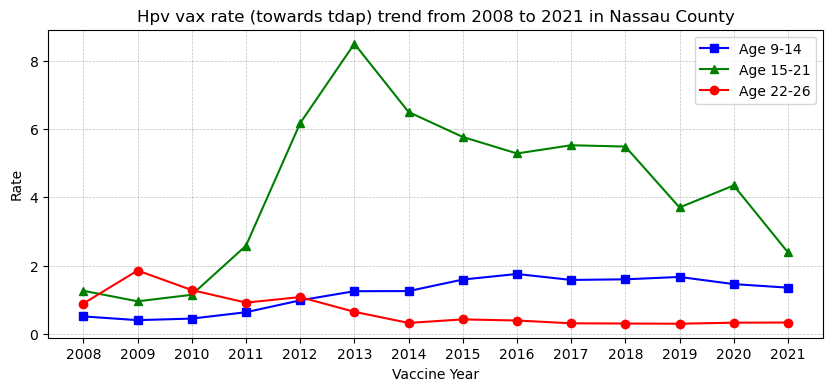

In [96]:
df_h = df_hpv_nassau
df_t = df_tdap_nassau

rate1 = generateRate(df_h,df_t,9,15)
rate2 = generateRate(df_h,df_t,16,21)
rate3 = generateRate(df_h,df_t,22,26)

plt.figure(figsize=(10, 4))

plt.plot(years, rate1, 's-',color='blue', label='Age 9-14')
plt.plot(years, rate2,'^-', color='green', label='Age 15-21')
plt.plot(years, rate3,'o-', color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vax rate (towards tdap) trend from 2008 to 2021 in Nassau County')

plt.xticks(years)
plt.legend()

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

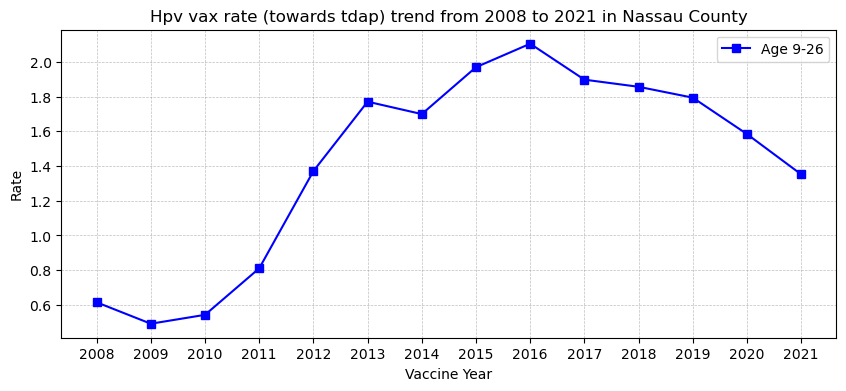

In [99]:
df_h = df_hpv_nassau
df_t = df_tdap_nassau

rate1 = generateRate(df_h,df_t,9,26)
# rate2 = generateRate(df_h,df_t,16,21)
# rate3 = generateRate(df_h,df_t,22,26)
nassau_rate = rate1
plt.figure(figsize=(10, 4))

plt.plot(years, rate1,'s-', color='blue', label='Age 9-26')
# plt.plot(years, rate2, color='green', label='Age 15-21')
# plt.plot(years, rate3, color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vax rate (towards tdap) trend from 2008 to 2021 in Nassau County')

plt.xticks(years)
plt.legend()

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

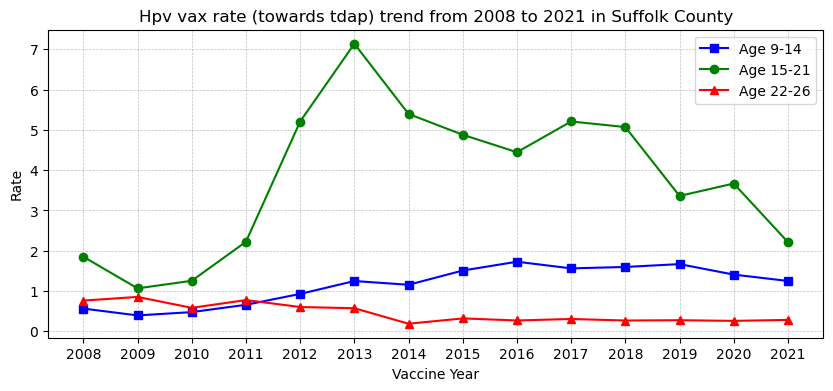

In [101]:
df_h = df_hpv_suffolk
df_t = df_tdap_suffolk

rate1 = generateRate(df_h,df_t,9,15)
rate2 = generateRate(df_h,df_t,16,21)
rate3 = generateRate(df_h,df_t,22,26)

plt.figure(figsize=(10, 4))

plt.plot(years, rate1,'s-', color='blue', label='Age 9-14')
plt.plot(years, rate2,'o-', color='green', label='Age 15-21')
plt.plot(years, rate3,'^-', color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vax rate (towards tdap) trend from 2008 to 2021 in Suffolk County')

plt.xticks(years)
plt.legend()

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

[0.70856779 0.49212521 0.58052525 0.81540454 1.27574817 1.71329879
 1.50388531 1.79590618 1.97633411 1.84426027 1.8305113  1.76441543
 1.50784116 1.25450685]


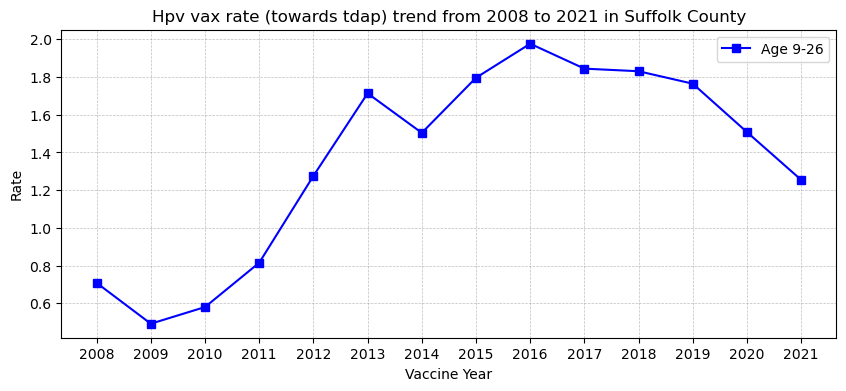

In [102]:
df_h = df_hpv_suffolk
df_t = df_tdap_suffolk

rate1 = generateRate(df_h,df_t,9,26)
# rate2 = generateRate(df_h,df_t,16,21)
# rate3 = generateRate(df_h,df_t,22,26)

print(rate1)
suffolkrate = rate1
plt.figure(figsize=(10, 4))

plt.plot(years, rate1,'s-', color='blue', label='Age 9-26')
# plt.plot(years, rate2, color='green', label='Age 15-21')
# plt.plot(years, rate3, color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vax rate (towards tdap) trend from 2008 to 2021 in Suffolk County')

plt.xticks(years)
plt.legend()
#
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

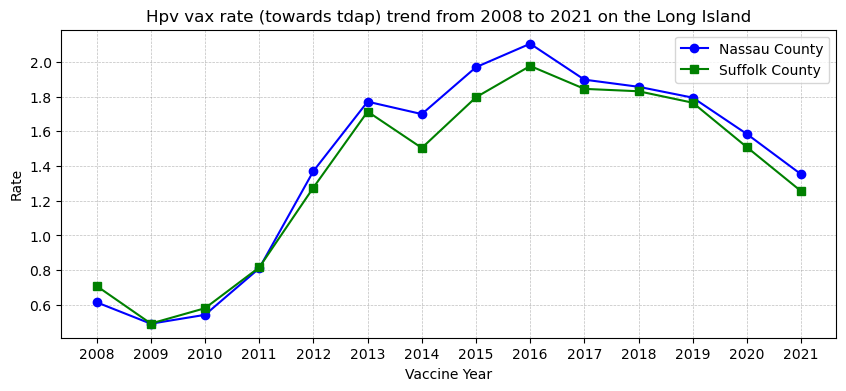

In [104]:
plt.figure(figsize=(10, 4))

plt.plot(years, nassau_rate,'o-', color='blue', label='Nassau County')
plt.plot(years, suffolkrate,'s-', color='green', label='Suffolk County')
# plt.plot(years, rate3, color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vax rate (towards tdap) trend from 2008 to 2021 on the Long Island')

plt.xticks(years)
plt.legend()

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

### Calculate the Rate in Each Zipcode

In [106]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])
df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])

In [107]:
df_hpv = df_hpv[(df_hpv['PatientAge'] <= 26) & (df_hpv['PatientAge'] >= 9)]
df_tdap = df_tdap[(df_tdap['PatientAge'] <= 26) & (df_tdap['PatientAge'] >= 9)]

In [111]:
grouped_h = df_hpv.groupby('PatientZip').size().reset_index(name='Count')
grouped_t = df_tdap.groupby('PatientZip').size().reset_index(name='Count')

In [112]:
grouped_t

,PatientZip,Count
0,501.0,6
1,544.0,3
2,6390.0,11
3,11001.0,5306
4,11003.0,9682
...,...,...
206,11975.0,131
207,11976.0,291
208,11977.0,482
209,11978.0,811


In [113]:
grouped_h

,PatientZip,Count
0,501.0,3
1,544.0,1
2,6390.0,10
3,11001.0,8428
4,11003.0,15207
...,...,...
207,11975.0,197
208,11976.0,483
209,11977.0,655
210,11978.0,1137


In [114]:
zips = list(grouped_h['PatientZip'])

In [123]:
zips = list(grouped_t['PatientZip'])
tdap_dct = {}

for i in range(0,len(zips)):
    tdap_dct[int(zips[i])] = grouped_t['Count'][i]
# tdap_dct

In [124]:
zips = list(grouped_h['PatientZip'])
hpv_dct = {}
for i in range(0,len(zips)):
    hpv_dct[int(zips[i])] = grouped_h['Count'][i]
# hpv_dct

In [139]:
zips = list(df_zipcode['zip'])
rate = []
for zp in zips:
    if zp in hpv_dct.keys() and zp in tdap_dct.keys():
        rate.append(hpv_dct[zp]/tdap_dct[zp])
    else:
        rate.append(0.0)

In [136]:
len(rate)

220

In [140]:
cols = ['zip', 'rate']
df_dct = {
    'zip':zips,
    'rate':rate
}

# Convert the dictionary into a DataFrame with custom column names
df1 = pd.DataFrame(df_dct, columns=cols)

In [141]:
df1

,zip,rate
0,501,0.500000
1,544,0.333333
2,6390,0.909091
3,11001,1.588391
4,11003,1.570647
...,...,...
215,11975,1.503817
216,11976,1.659794
217,11977,1.358921
218,11978,1.401973


In [143]:
df1.to_csv('rate_zipcode.csv', index=False)

In [147]:
count = 0
for i in range(0,len(df1)):
    if df1['rate'][i]>1.0:
        count += 1
print(count)

196
